# **Housing Sales Analysis Final Project**
Team Members:
Jameel Saccoh
James Shoenhair
Bereket Tarekegn

In [14]:
#install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load and preview housing dataset
housing = pd.read_csv('house_sales.csv')
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
#Find the number of records within the dataset
print("Number of records:", housing.shape[0],"\n")

#Find all the null values within the dataset
print(housing.isna().sum())

Number of records: 21613 

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [17]:
#Handle missing values for bedroom and bathroom columns with median imputation
housing['bedrooms'].fillna(housing['bedrooms'].median(), inplace=True)
housing['bathrooms'].fillna(housing['bathrooms'].median(), inplace=True)

#Handle missing values for sqft_living and sqft_lot columns with mean imputation rounded to the nearest integer
housing['sqft_living'].fillna(round(housing['sqft_living'].mean(),0), inplace=True)
housing['sqft_lot'].fillna(round(housing['sqft_lot'].mean(),0), inplace=True)

#Check for any remaining null values
print(housing.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


C:\Users\jamee\AppData\Local\Temp\ipykernel_8164\3364273193.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing['bedrooms'].fillna(housing['bedrooms'].median(), inplace=True)
C:\Users\jamee\AppData\Local\Temp\ipykernel_8164\3364273193.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

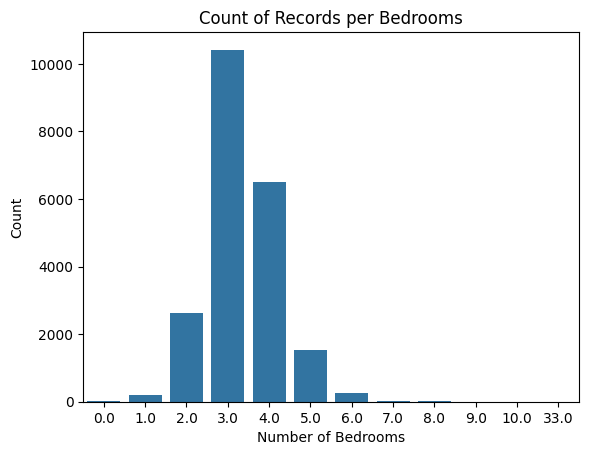

In [ ]:
#Plot count of records per number of bedrooms
sns.countplot(x='bedrooms', data=housing)
plt.title('Count of Records per Bedrooms number')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

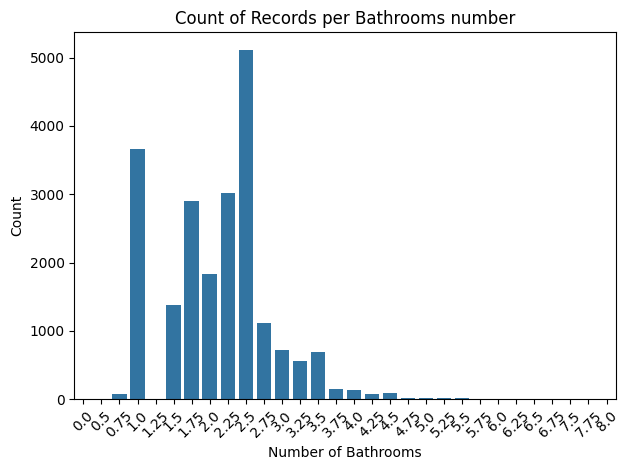

In [24]:
#Plot count of records per number of bathrooms
sns.countplot(x='bathrooms', data=housing)
plt.title('Count of Records per Bathrooms number')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

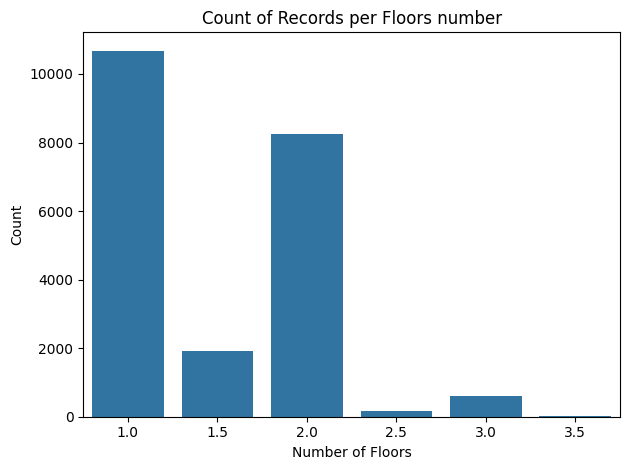

In [28]:
#Plot count of records per number of floors
sns.countplot(x='floors', data=housing)
plt.title('Count of Records per Floors number')
plt.xlabel('Number of Floors')
plt.ylabel('Count')
plt.tight_layout()

Insights: As we can see from our plots, the majority of the houses within this dataset are based off 3-4 bedroom houses, 1-2.5 bathroom houses, and 1-2 floors. These visualizations can paint an image of the house structure this dataset will focus on. 

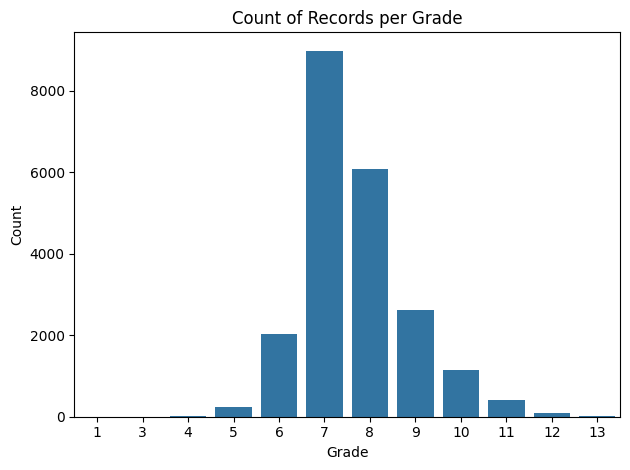

In [ ]:
#Plot count of records per grade
sns.countplot(x='grade', data=housing)
plt.title('Count of Records per Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.tight_layout()

Insights: Based off the plot, we can see that the majority of our records have a grade of 7 and 8. This indicates that most of our data is in the middle of the grade scale. Houses dont seem to have very negative grades, but also do not have very positive grades and seem to fall around the middle and above average grades.

Correlation between sqft_living and sqft_lot: 0.16019890730478978


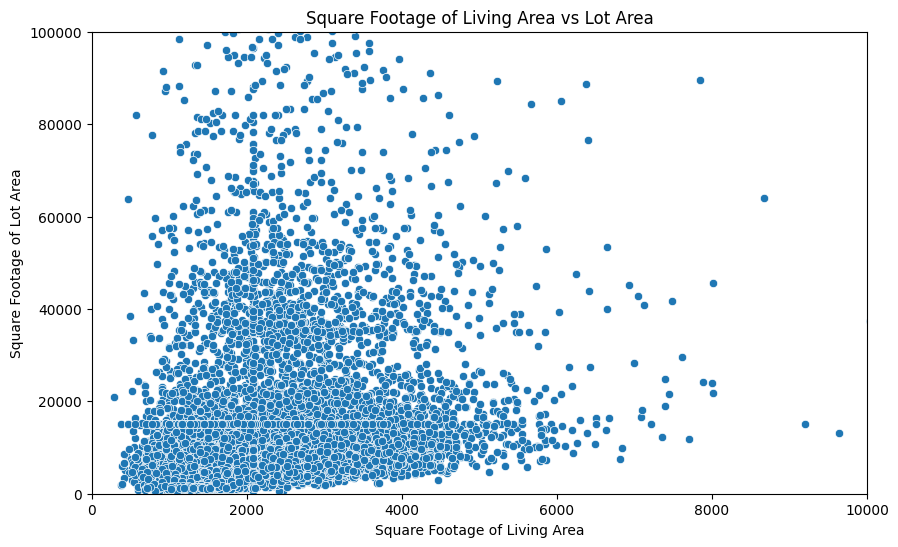

In [ ]:
# Plot of square footage of living area vs lot area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='sqft_lot', data=housing)
plt.title('Square Footage of Living Area vs Lot Area')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Square Footage of Lot Area')
plt.xlim(0, 10000)
plt.ylim(0, 100000)
plt.show()

# Calculate and print correlation between sqft_living and sqft_lot
print("Correlation between sqft_living and sqft_lot:", housing['sqft_living'].corr(housing['sqft_lot']))

Insights: Based off the correlation index and the scatterplot, we can see that Square footage of living area and square footage of lot area have little to no correlation. The correlation index is 0.16019890730478978 and this indicates the little to no correlation between the two variables.